#Task 1: Exploratory Data Analysis (EDA) and Business Insights

**Importing Librarires**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Loading the Datasets**


In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [6]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [7]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


**Step 2: Data Cleaning and Preprocessing**


Checking for missing values


In [8]:
print("Missing values in Customers:")
print(customers.isnull().sum())
print("\nMissing values in Products:")
print(products.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Converting date columns to datetime format


In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Checking for duplicates and then drop them

In [10]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


Merging all the three datasets


In [11]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')


In [12]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


**Step 3: Exploratory Data Analysis**


1. Customers Analysis


**Customer Distribution by Region**


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-13-11559664f407>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


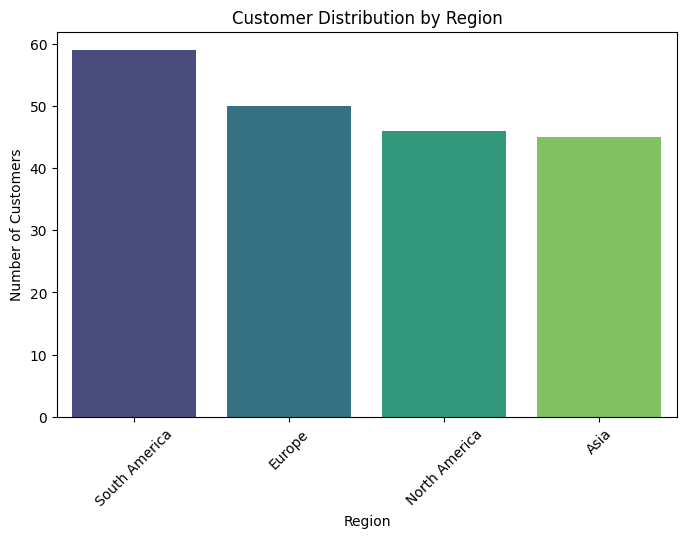

In [13]:
region_distribution = customers['Region'].value_counts()
print(region_distribution)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

**Signup Trends**


**Region-Specific Sales**


<ipython-input-20-0659cb7289c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='autumn')


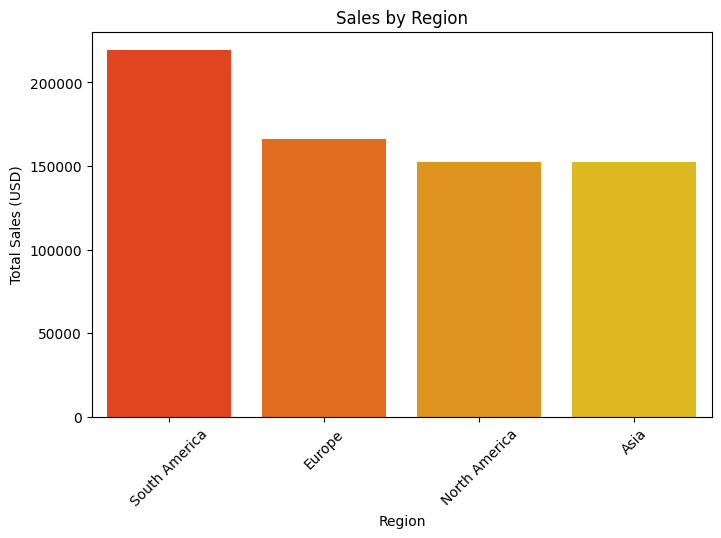

In [20]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='autumn')
plt.title('Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


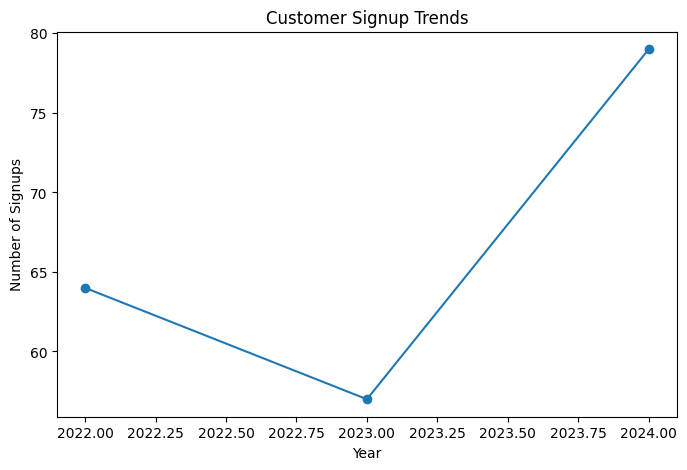

In [14]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print(signup_trends)
plt.figure(figsize=(8, 5))
plt.plot(signup_trends.index, signup_trends.values, marker='o')
plt.title('Customer Signup Trends')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.show()

**Active Customers (based on transactions)**


In [15]:
active_customers = merged_data['CustomerID'].nunique()
print(f"Number of active customers: {active_customers}")

Number of active customers: 199


2. Products Analysis


Analyzing the Category Distribution


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-16-1e59ae624999>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')


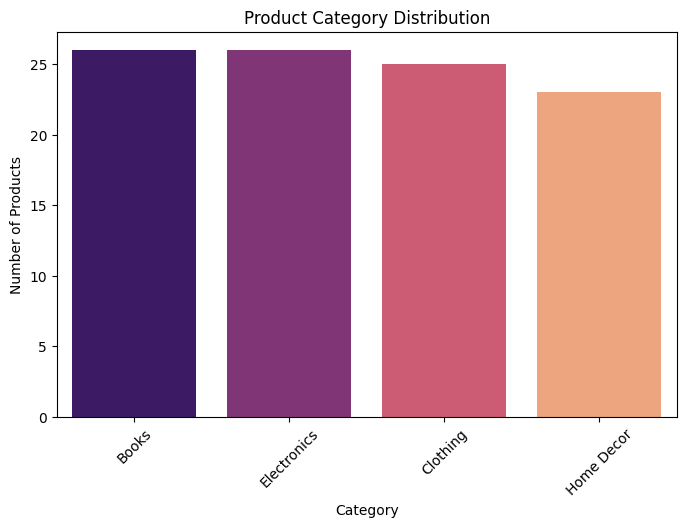

In [16]:
category_distribution = products['Category'].value_counts()
print(category_distribution)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')
plt.title('Product Category Distribution')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

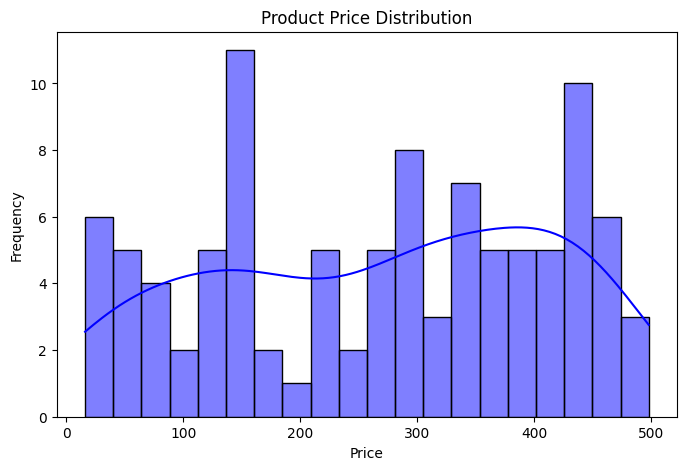

In [17]:
# Price Range Analysis
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Top Products by Quantity Sold


<ipython-input-19-bc98399fa1f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='spring')


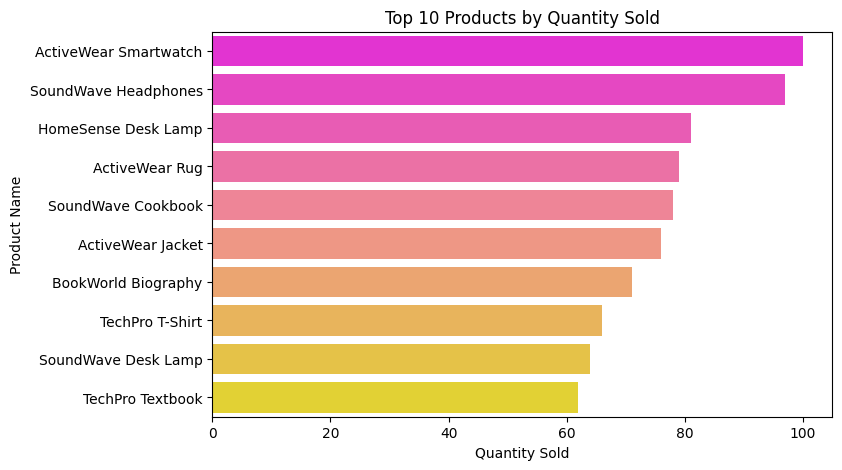

In [19]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='spring')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

**Most Profitable Product**


In [22]:
most_profitable_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).idxmax()


Top Customers by Total Spend


<ipython-input-18-d5221ced395a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='cool')


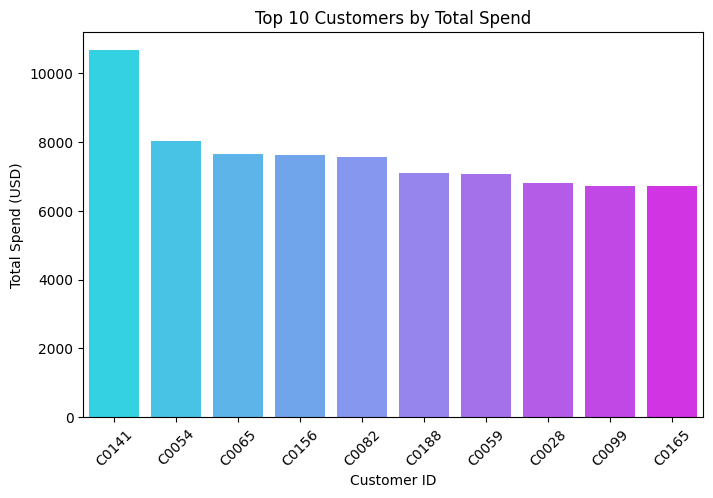

In [18]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='cool')
plt.title('Top 10 Customers by Total Spend')
plt.ylabel('Total Spend (USD)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.show()


Calculating total revenue contribution by each customer for the business insight


In [24]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum()

# Sort customers by revenue contribution in descending order
customer_revenue = customer_revenue.sort_values(ascending=False)

# Calculate cumulative revenue contribution percentage
cumulative_revenue = customer_revenue.cumsum()
total_revenue = customer_revenue.sum()
cumulative_revenue_percentage = (cumulative_revenue / total_revenue) * 100






Finding the top 10% of customers contributing to revenue


In [ ]:
top_10_percent_cutoff = cumulative_revenue_percentage[cumulative_revenue_percentage <= 10].index

# Get details of top 10% customers
top_10_percent_customers = customers[customers['CustomerID'].isin(top_10_percent_cutoff)]

# Merge to find their regions and demographics
top_10_percent_customers = top_10_percent_customers.merge(customer_revenue, on='CustomerID', how='left')
top_10_percent_customers = top_10_percent_customers.rename(columns={'TotalValue': 'RevenueContribution'})

In [25]:
# Display the result
print(top_10_percent_customers)



  CustomerID          CustomerName         Region SignupDate  \
0      C0028         Jennifer Pena           Asia 2024-06-29   
1      C0054          Bruce Rhodes           Asia 2024-09-29   
2      C0059  Mrs. Kimberly Wright  North America 2024-04-07   
3      C0065          Gerald Hines  North America 2024-07-10   
4      C0082          Aimee Taylor  South America 2022-05-13   
5      C0141          Paul Parsons         Europe 2023-02-23   
6      C0156         William Adams  North America 2023-08-19   
7      C0188             Anna Ball  South America 2022-05-17   

   RevenueContribution  
0              6819.57  
1              8040.39  
2              7073.28  
3              7663.70  
4              7572.91  
5             10673.87  
6              7634.45  
7              7111.32  


Visualizating revenue contribution from top 10% customers


<ipython-input-26-5d9864ac613a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


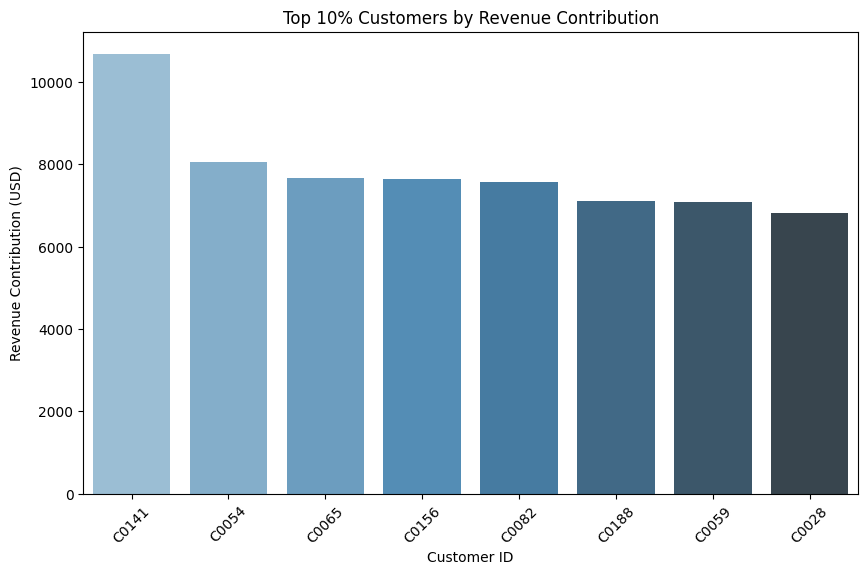

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_percent_customers.sort_values('RevenueContribution', ascending=False),
    x='CustomerID',
    y='RevenueContribution',
    palette='Blues_d'
)
plt.title('Top 10% Customers by Revenue Contribution')
plt.xlabel('Customer ID')
plt.ylabel('Revenue Contribution (USD)')
plt.xticks(rotation=45)
plt.show()



Additional summary


In [27]:
top_10_revenue = top_10_percent_customers['RevenueContribution'].sum()
top_10_revenue_percentage = (top_10_revenue / total_revenue) * 100
print(f"Top 10% customers contribute {top_10_revenue_percentage:.2f}% of total revenue.")

Top 10% customers contribute 9.07% of total revenue.


***Aggregating above Business Insights***


In [28]:
print("\nBusiness Insights:")
print("1. Region with most customers:", region_distribution.idxmax())
print("2. Region generating highest sales:", region_sales.idxmax())
print("3. Peak signup year:", signup_trends.idxmax())
print("4. Most popular product category:", category_distribution.idxmax())
print("5. Product with highest sales quantity:", top_products.idxmax())
print("6. Most profitable product:", most_profitable_product)



Business Insights:
1. Region with most customers: South America
2. Peak signup year: 2024
3. Most popular product category: Books
4. Product with highest sales quantity: ActiveWear Smartwatch
5. Region generating highest sales: South America
6. Most profitable product: ActiveWear Smartwatch
